In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv("tabla_final.csv")
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,5.0,2.0,2016-03-03 02:02:57,8.0,315.0,17,KE,1.0,38.0


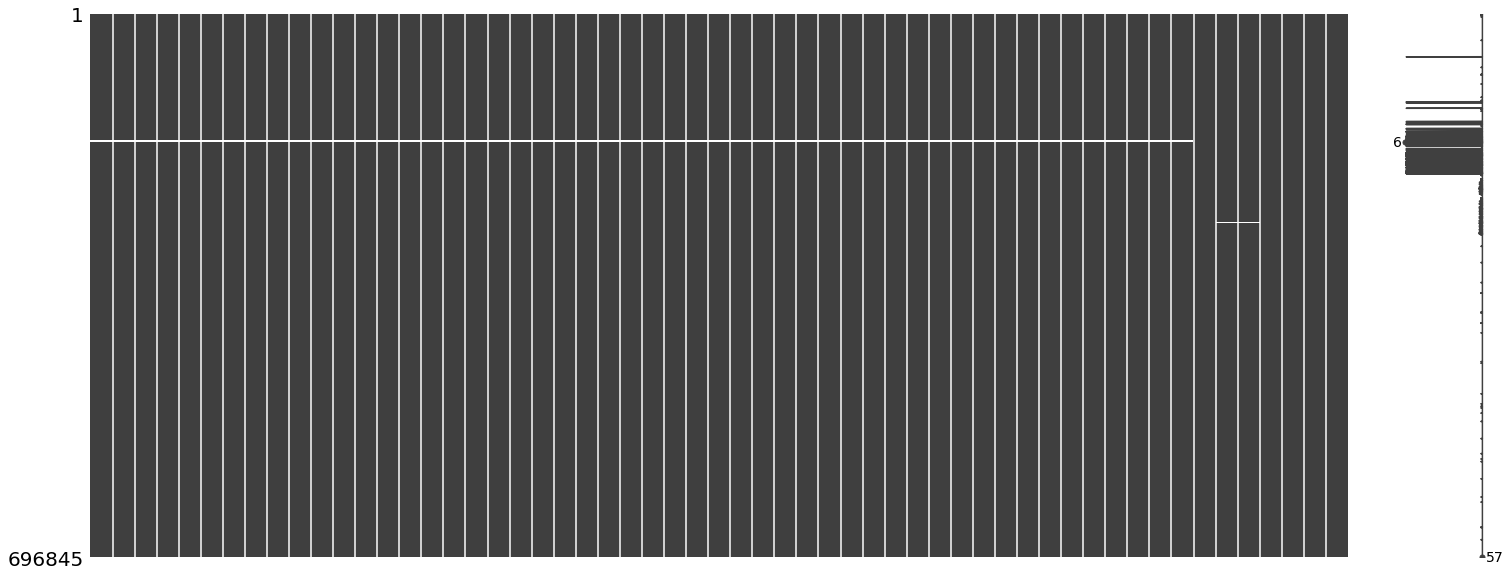

In [4]:
msno.matrix(df)

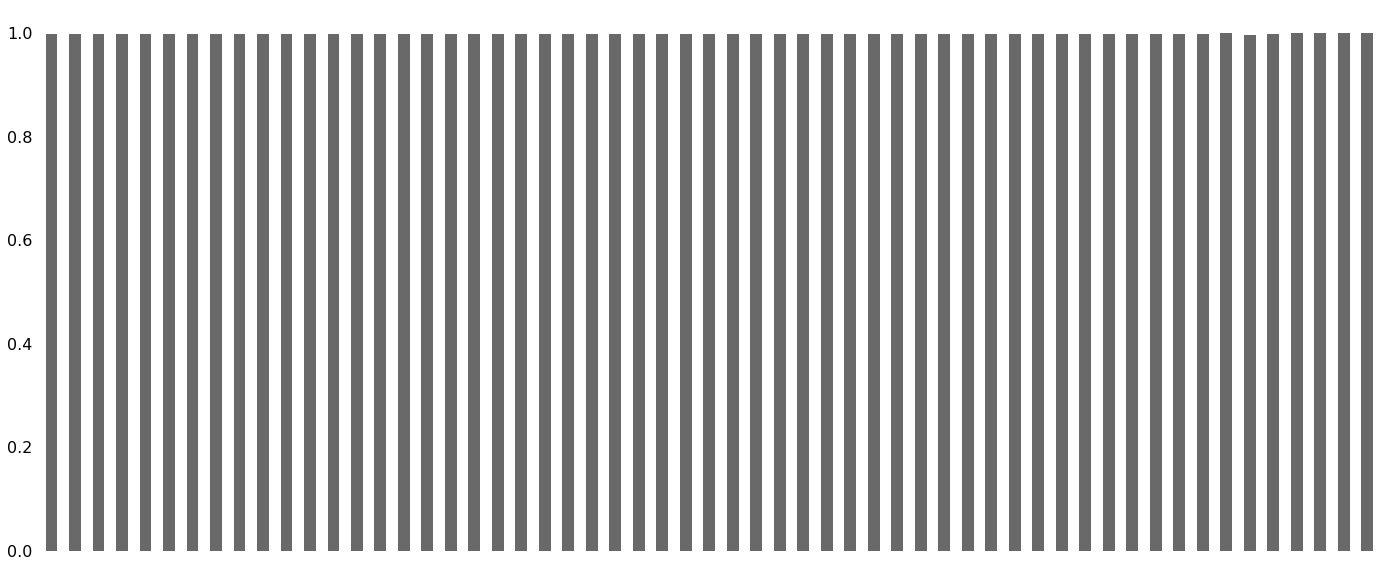

In [5]:
msno.bar(df)

El algoritmo apriori, dado por la librería mlxtend, requiere un dataframe que tenga valores en un dominio [0, 1] o [Verdadero, Falso]. Como los datos actualmente son categóricos, entonces necesitamos un Hot Encode de los datos.

En este caso solo se evalua las habilidades EXT con un 1 si el valor es mayor a 3

In [12]:
var = [x for x in df.columns if x[0:3] == 'EXT']

In [25]:
df = df[var]

In [28]:
for i in var:
    df[i] = np.where(df[i]>3,1,0)

In [29]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,1
2,0,0,1,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
696840,1,0,1,0,1,0,0,0,0,0
696841,1,0,1,0,1,0,0,0,1,0
696842,1,0,1,0,0,0,1,1,0,0
696843,0,1,0,1,0,0,0,1,0,1


## Aplicando Apriori

In [31]:
freq_items = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 24 combinations | Sampling itemset size 4


,support,itemsets
0,0.249982,(EXT1)
1,0.327796,(EXT2)
2,0.438991,(EXT3)
3,0.430562,(EXT4)
4,0.470006,(EXT5)


In [32]:
freq_items.itemsets.unique()

array([frozenset({'EXT1'}), frozenset({'EXT2'}), frozenset({'EXT3'}),
       frozenset({'EXT4'}), frozenset({'EXT5'}), frozenset({'EXT6'}),
       frozenset({'EXT7'}), frozenset({'EXT8'}), frozenset({'EXT9'}),
       frozenset({'EXT10'}), frozenset({'EXT4', 'EXT2'}),
       frozenset({'EXT8', 'EXT2'}), frozenset({'EXT10', 'EXT2'}),
       frozenset({'EXT3', 'EXT5'}), frozenset({'EXT3', 'EXT7'}),
       frozenset({'EXT9', 'EXT3'}), frozenset({'EXT4', 'EXT8'}),
       frozenset({'EXT10', 'EXT4'}), frozenset({'EXT7', 'EXT5'}),
       frozenset({'EXT9', 'EXT5'}), frozenset({'EXT10', 'EXT8'}),
       frozenset({'EXT4', 'EXT8', 'EXT2'}),
       frozenset({'EXT10', 'EXT4', 'EXT2'}),
       frozenset({'EXT10', 'EXT8', 'EXT2'}),
       frozenset({'EXT3', 'EXT7', 'EXT5'}),
       frozenset({'EXT9', 'EXT3', 'EXT5'}),
       frozenset({'EXT10', 'EXT4', 'EXT8'})], dtype=object)

## Reglas de Asociación

In [33]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(EXT2),(EXT4),0.327796,0.430562,0.244703,0.746510,1.733803,0.103566,2.246390
1,(EXT2),(EXT8),0.327796,0.527337,0.246432,0.751785,1.425626,0.073573,1.904250
2,(EXT2),(EXT10),0.327796,0.585210,0.276891,0.844705,1.443420,0.085061,2.670974
3,(EXT3),(EXT5),0.438991,0.470006,0.320895,0.730982,1.555263,0.114566,1.970109
4,(EXT5),(EXT3),0.470006,0.438991,0.320895,0.682747,1.555263,0.114566,1.768332
5,(EXT7),(EXT3),0.321828,0.438991,0.239250,0.743410,1.693449,0.097970,2.186397
6,(EXT9),(EXT3),0.385612,0.438991,0.248514,0.644467,1.468063,0.079234,1.577936
7,(EXT4),(EXT8),0.430562,0.527337,0.331785,0.770587,1.461280,0.104734,2.060314
8,(EXT8),(EXT4),0.527337,0.430562,0.331785,0.629172,1.461280,0.104734,1.535584
9,(EXT10),(EXT4),0.585210,0.430562,0.357279,0.610513,1.417945,0.105309,1.462022
